# Importing Libraries

In [ ]:
import pandas as pd
import numpy as np
import sklearn as skl
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
%matplotlib inline
import matplotlib

sns.set_style('darkgrid')
matplotlib.rcParams['font.size']=14
matplotlib.rcParams['figure.figsize']= (10,6)
matplotlib.rcParams['figure.facecolor']='#00000000'
pd.read_csv('Health_insurance.csv')

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [ ]:
df_medical=pd.read_csv('Health_insurance.csv')

In [ ]:
df_medical.head(5)

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [ ]:
df_medical.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [ ]:
df_medical.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


# Data Cleaning

In [ ]:
df_medical.duplicated().sum()

np.int64(1)

In [ ]:
df_medical.drop_duplicates(inplace=True)

In [ ]:
df_medical.duplicated().sum()

np.int64(0)

In [ ]:
df_medical.isnull().sum()

,0
age,0
sex,0
bmi,0
children,0
smoker,0
region,0
charges,0


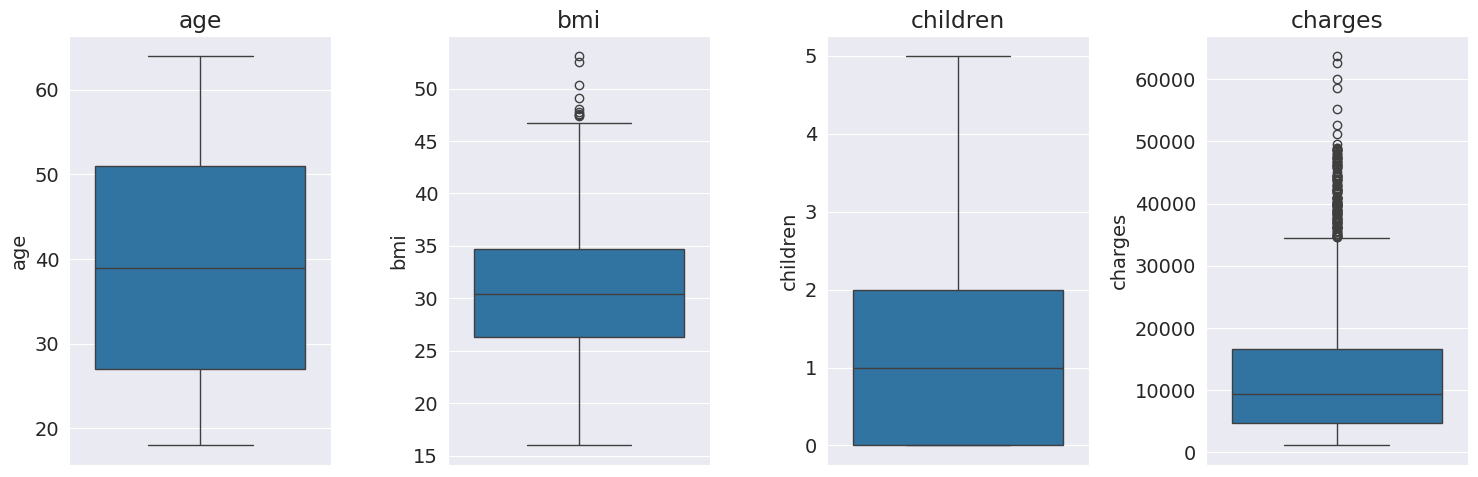

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

numerical_cols = ['age', 'bmi', 'children', 'charges']

plt.figure(figsize=(15, 5))
for i, col in enumerate(numerical_cols, 1):
    plt.subplot(1, len(numerical_cols), i)
    sns.boxplot(y=df_medical[col]) #
    plt.title(col)
plt.tight_layout()
plt.show()

In [ ]:
from scipy import stats

def remove_outliers_zscore(df, column, threshold=3):

    z_scores = np.abs(stats.zscore(df[column]))
    return df[z_scores < threshold]
for col in numerical_cols:
    print(f"Removing outliers from {col} using Z-score")
    print(f"Original shape: {df_medical.shape}")
    df_medical = remove_outliers_zscore(df_medical, col)
    print(f"New shape: {df_medical.shape}\n")

Removing outliers from age using Z-score
Original shape: (1337, 7)
New shape: (1337, 7)

Removing outliers from bmi using Z-score
Original shape: (1337, 7)
New shape: (1333, 7)

Removing outliers from children using Z-score
Original shape: (1333, 7)
New shape: (1315, 7)

Removing outliers from charges using Z-score
Original shape: (1315, 7)
New shape: (1308, 7)



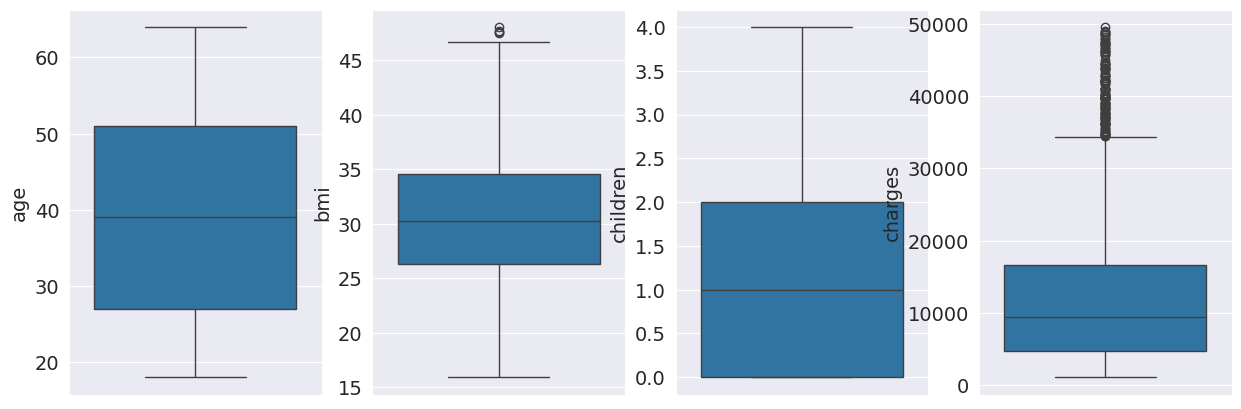

In [ ]:
plt.figure(figsize=(15, 5))
for i, col in enumerate(numerical_cols, 1):
    plt.subplot(1, len(numerical_cols), i)
    sns.boxplot(y=df_medical[col])

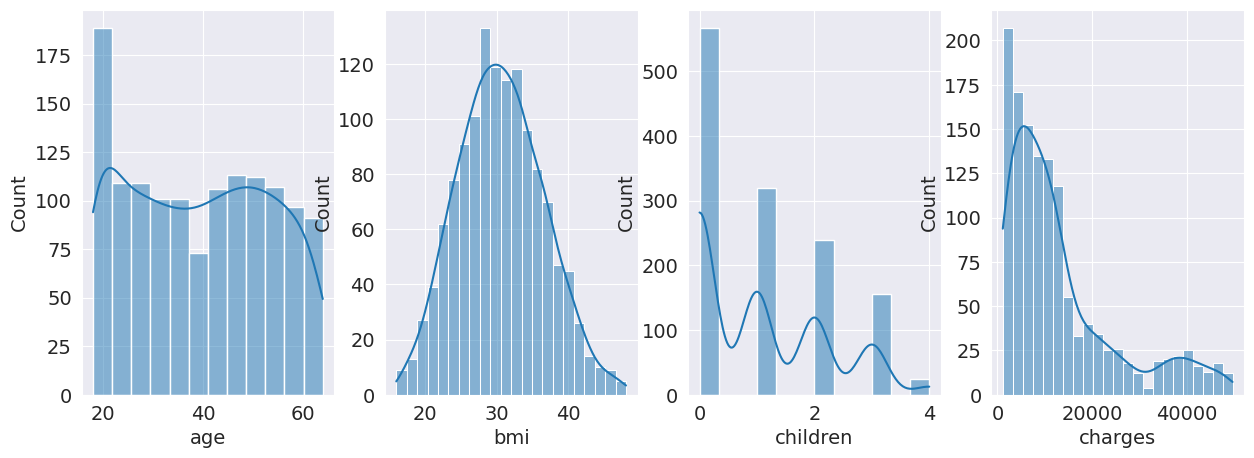

In [ ]:
plt.figure(figsize=(15, 5))
sns.set_style('darkgrid')
for i, col in enumerate(numerical_cols, 1):
    plt.subplot(1, len(numerical_cols), i)
    sns.histplot(df_medical[col], kde=True)

In [ ]:
fig=px.histogram(df_medical,x='age', y='charges', marginal='box',  title='Distribution of age with charge')
fig.update_layout(bargap=0.1)
fig.show()

In [ ]:
fig=px.histogram(df_medical,x='age', marginal='box', nbins=47, title='Distribution of age')
fig.update_layout(bargap=0.1)
fig.show()

In [ ]:
fig=px.histogram(df_medical,x='bmi', marginal='box', color_discrete_sequence=['red'], title='Distribution of bmi')
fig.update_layout(bargap=0.1)
fig.show()

In [ ]:
fig=px.histogram(df_medical,x='charges', marginal='box',color='smoker', color_discrete_sequence=['green' , 'grey'], title='Annual medical charges')
fig.update_layout(bargap=0.1)
fig.show()

In [ ]:
px.scatter(df_medical, x='age' , y='smoker')

In [ ]:
px.scatter(df_medical, x='bmi' , y='smoker')

In [ ]:
# Convert 'sex' and 'smoker' columns to numeric representations
df_medical['sex'] = df_medical['sex'].map({'female': 0, 'male': 1})
df_medical['smoker'] = df_medical['smoker'].map({'no': 0, 'yes': 1})

# Convert 'region' column to numeric representation using one-hot encoding
df_medical = pd.get_dummies(df_medical, columns=['region'], prefix=['region'])

# Calculate the correlation matrix
df_medical.corr()

,age,sex,bmi,children,smoker,charges,region_northeast,region_northwest,region_southeast,region_southwest
age,1.000000,-0.018180,0.118272,0.058142,-0.029671,0.304541,0.003942,-0.001525,-0.015027,0.013159
sex,-0.018180,1.000000,0.042514,0.014774,0.079479,0.060242,-0.002611,-0.007946,0.014455,-0.004372
bmi,0.118272,0.042514,1.000000,0.029927,-0.005289,0.191523,-0.137218,-0.134501,0.261051,0.002552
children,0.058142,0.014774,0.029927,1.000000,0.028498,0.099814,-0.018475,0.046262,-0.027825,0.000875
smoker,-0.029671,0.079479,-0.005289,0.028498,1.000000,0.785115,0.005169,-0.039933,0.071560,-0.039230
charges,0.304541,0.060242,0.191523,0.099814,0.785115,1.000000,0.011016,-0.044609,0.074414,-0.043363
region_northeast,0.003942,-0.002611,-0.137218,-0.018475,0.005169,0.011016,1.000000,-0.324557,-0.345334,-0.320536
region_northwest,-0.001525,-0.007946,-0.134501,0.046262,-0.039933,-0.044609,-0.324557,1.000000,-0.346048,-0.321199
region_southeast,-0.015027,0.014455,0.261051,-0.027825,0.071560,0.074414,-0.345334,-0.346048,1.000000,-0.341761
region_southwest,0.013159,-0.004372,0.002552,0.000875,-0.039230,-0.043363,-0.320536,-0.321199,-0.341761,1.000000


In [ ]:
fig=px.scatter(df_medical,
               x='age',
               y='charges',
               color='smoker',


              opacity=0.8,

               title='Age vs. Charges')
fig.update_traces(marker_size=5)
fig.show()

In [ ]:
fig=px.scatter(df_medical,
               x='bmi',
               y='charges',
               color='smoker',
               opacity=0.8,
               title='BMI vs. Charges')
fig.update_traces(marker_size=5)
fig.show()

In [ ]:
df_medical.corr()

,age,sex,bmi,children,smoker,charges,region_northeast,region_northwest,region_southeast,region_southwest
age,1.000000,-0.018180,0.118272,0.058142,-0.029671,0.304541,0.003942,-0.001525,-0.015027,0.013159
sex,-0.018180,1.000000,0.042514,0.014774,0.079479,0.060242,-0.002611,-0.007946,0.014455,-0.004372
bmi,0.118272,0.042514,1.000000,0.029927,-0.005289,0.191523,-0.137218,-0.134501,0.261051,0.002552
children,0.058142,0.014774,0.029927,1.000000,0.028498,0.099814,-0.018475,0.046262,-0.027825,0.000875
smoker,-0.029671,0.079479,-0.005289,0.028498,1.000000,0.785115,0.005169,-0.039933,0.071560,-0.039230
charges,0.304541,0.060242,0.191523,0.099814,0.785115,1.000000,0.011016,-0.044609,0.074414,-0.043363
region_northeast,0.003942,-0.002611,-0.137218,-0.018475,0.005169,0.011016,1.000000,-0.324557,-0.345334,-0.320536
region_northwest,-0.001525,-0.007946,-0.134501,0.046262,-0.039933,-0.044609,-0.324557,1.000000,-0.346048,-0.321199
region_southeast,-0.015027,0.014455,0.261051,-0.027825,0.071560,0.074414,-0.345334,-0.346048,1.000000,-0.341761
region_southwest,0.013159,-0.004372,0.002552,0.000875,-0.039230,-0.043363,-0.320536,-0.321199,-0.341761,1.000000


In [ ]:
selected_features=['age','bmi','children','sex','smoker','region_northeast','region_northwest','region_southeast','region_southwest']
correlation_matrix = df_medical[selected_features].corr(numeric_only=True)
print(correlation_matrix)

                       age       bmi  children       sex    smoker  \
age               1.000000  0.118272  0.058142 -0.018180 -0.029671   
bmi               0.118272  1.000000  0.029927  0.042514 -0.005289   
children          0.058142  0.029927  1.000000  0.014774  0.028498   
sex              -0.018180  0.042514  0.014774  1.000000  0.079479   
smoker           -0.029671 -0.005289  0.028498  0.079479  1.000000   
region_northeast  0.003942 -0.137218 -0.018475 -0.002611  0.005169   
region_northwest -0.001525 -0.134501  0.046262 -0.007946 -0.039933   
region_southeast -0.015027  0.261051 -0.027825  0.014455  0.071560   
region_southwest  0.013159  0.002552  0.000875 -0.004372 -0.039230   

                  region_northeast  region_northwest  region_southeast  \
age                       0.003942         -0.001525         -0.015027   
bmi                      -0.137218         -0.134501          0.261051   
children                 -0.018475          0.046262         -0.027825   
sex

In [ ]:
px.scatter(df_medical, x='age' , y='age')

In [ ]:
px.scatter(df_medical, x='bmi' , y='bmi')

In [ ]:
px.scatter(df_medical, x='children' , y='children')

<Axes: >

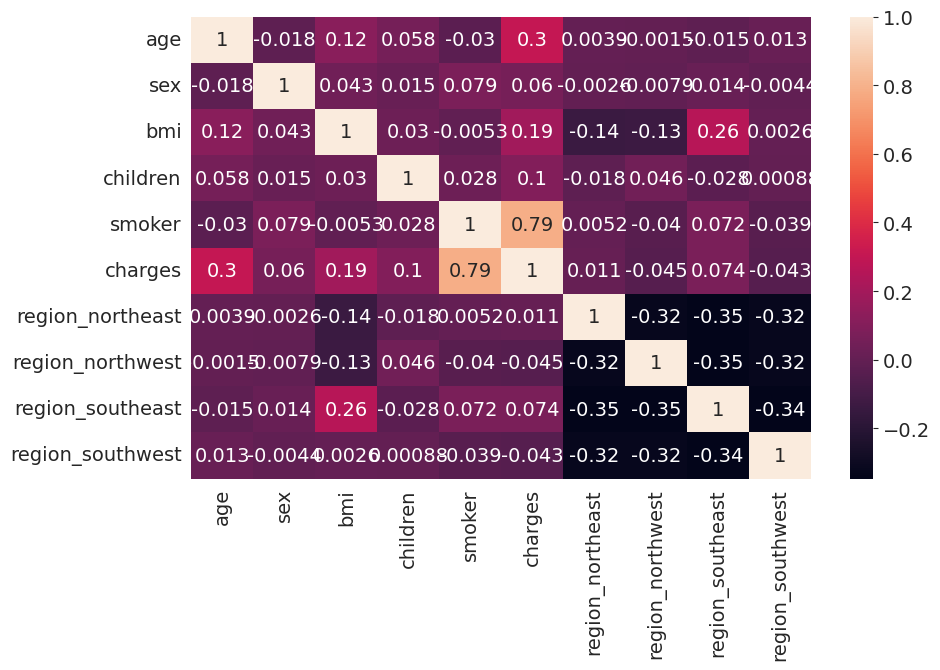

In [ ]:
sns.heatmap(df_medical.corr(), annot=True)

In [ ]:
# EDA REPORT<>
# smoker > strong positive corr with charges (0.78)  smokers are charged more due to higher health risks
# age > moderate positive corr with charges (o.29)   older individuals tend to have higher insurance costs
# bmi > weak to moderate positive corr (0.20)   higher bmi can lead to higher charges  possibly due to obesity
# children > very weak positive corr (0.07)   more children slightly increase charges due to dependents
# sex >    negligable corr (o.06)   gender has minimal impact on charges
# region > near zero corr (-0.01)  does not influence charges

# smokers are charged $23000 more on avg compared to non_smokers
#  charges generally increase with age and bmi
#  region and sex do not significally determine charges






In [ ]:
df_non_smoker=df_medical[df_medical['smoker']==0]


<Axes: title={'center': 'Age vs. Charges'}, xlabel='age', ylabel='charges'>

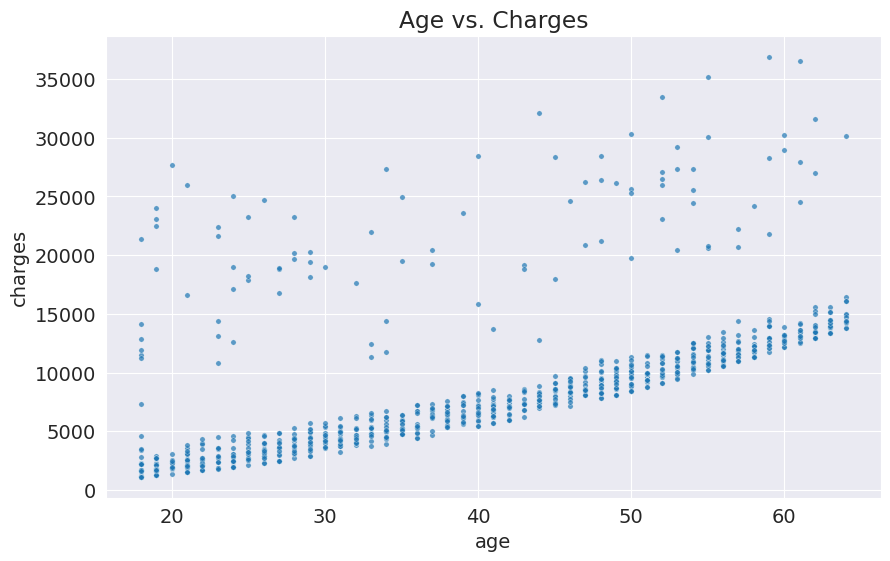

In [ ]:
plt.title('Age vs. Charges')
sns.scatterplot(x='age',y='charges',data=df_non_smoker  , alpha=0.7 , s=15)

In [ ]:
# supervised linear regression
def estimate_charges (age , w , b):
    return w*age + b


In [ ]:
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split


features = ['age', 'bmi', 'smoker']
target = 'charges'


X = df_medical[features]
y = df_medical[target]


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
model = LinearRegression()
model.fit(X_train, y_train)


LinearRegression()

In [ ]:
w = model.coef_        # Coefficients for [age, bmi, smoker]
b = model.intercept_   # Intercept (bias)

print("Weights:", w)
print("Intercept:", b)


Weights: [  263.63911007   302.00259305 23264.72048842]
Intercept: -11094.117921962299


In [ ]:
def estimate_charges(age, bmi, smoker, w, b):
    """
    Estimate insurance charges using a linear model.
    Parameters: age, bmi, smoker (1 or 0), w (weights), b (intercept)
    """
    return w[0] * age + w[1] * bmi + w[2] * smoker + b


In [ ]:
# Example prediction for a 35-year-old smoker with BMI 28.5
predicted_charge = estimate_charges(age=35, bmi=28.5, smoker=1, w=w, b=b)
print(f"Estimated charges: ${predicted_charge:.2f}")


Estimated charges: $30005.05


In [ ]:
predicted_charge=estimate_charges(age=40, bmi=45, smoker=0, w=w, b=b)
print(f"Estimated charges: ${predicted_charge:.2f}")

Estimated charges: $13041.56


In [ ]:
predicted_charge=estimate_charges(age=17, bmi=60, smoker=1, w=w, b=b)
print(f"Estimated charges: ${predicted_charge:.2f}")

Estimated charges: $34772.62


<ipython-input-41-46fd49b698d3>:14: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




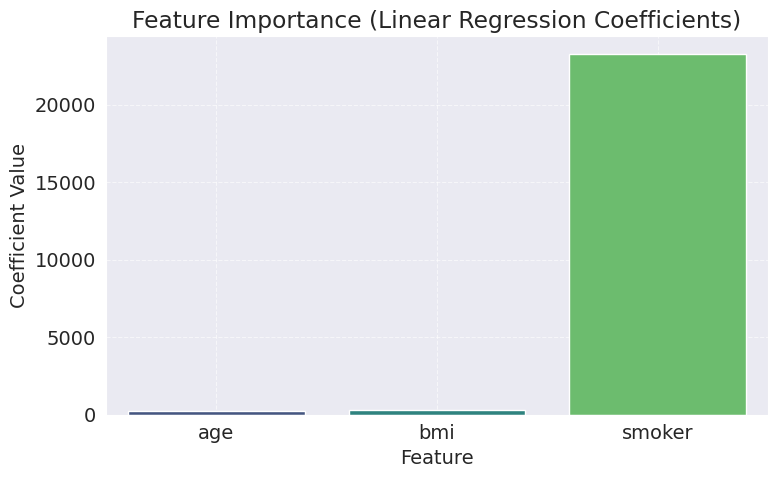

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd


feature_names = ['age', 'bmi', 'smoker']
coef_df = pd.DataFrame({
    'Feature': feature_names,
    'Coefficient': w
})


plt.figure(figsize=(8, 5))
sns.barplot(x='Feature', y='Coefficient', data=coef_df, palette='viridis')
plt.title('Feature Importance (Linear Regression Coefficients)')
plt.ylabel('Coefficient Value')
plt.xlabel('Feature')
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

In [ ]:
#ML REPORT <>
# [84]
# ft used age,
#          bmi,
#          smoker
# intercept -11,707.80
# coeff age:+259,
#       bmi+326.45,
#        smoker+23,675.37
# interpretations > for every additional of age , charges increase by $259
#                 >for each unit increase in bmi , charges increase by $326
#                 >being a smoker adds 23,675 to predicted insurance cost
#smoker has most influence
# then bmi and age



#EG,
# 35yrs bmi28.5(overweight)  smoker = yes ... predicted charge $30,350.76
# smoking is most significant cost driver
# preventive mearsures eg healthy weight and smoking cessation lead to lower premimiums


In [ ]:
import plotly.express as px

# Create the histogram figure using px.histogram
fig = px.histogram(df_medical, x='age', y='charges', marginal='box', title='Distribution of age with charge')
# Correct the layout update to use 'bargap' instead of the invalid 'piechart'
fig.update_layout(bargap=0.1)
fig.show()